In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorly.decomposition import parafac2
import tensorly as tl
from tensorly.parafac2_tensor import parafac2_to_slice
from tensorly.metrics.regression import variance as tl_var
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from tfac.figures.figureCommon import subplotLabel, getSetup
from sklearn.metrics import roc_curve, roc_auc_score
from tfac.MRSA_dataHelpers import produce_outcome_bools, get_patient_info, form_MRSA_tensor
from tfac.tensor import R2Xparafac2

def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=False).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-7, n_iter_max=1000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

## tol=1e-7

In [16]:
_, statusID = get_patient_info()
outcomes = produce_outcome_bools(statusID)
components = 38
variance = 1
tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
patient_matrix = parafac2tensor[1][2]
score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
auc = roc_auc_score(outcomes, score_y)
print(auc)

KeyboardInterrupt: 

In [3]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

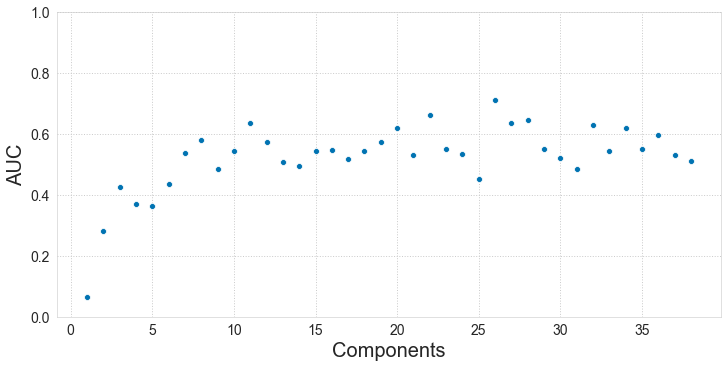

In [4]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [5]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

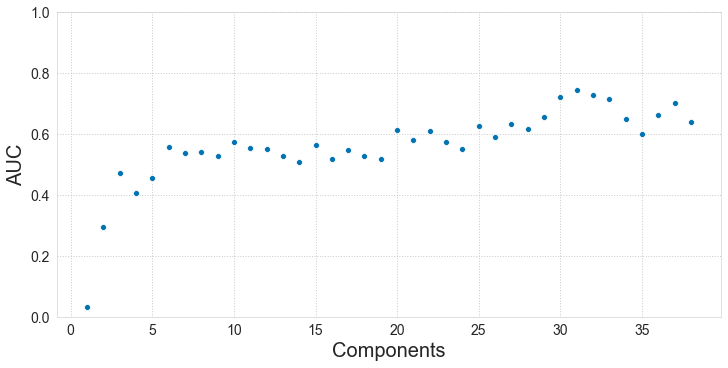

In [6]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [7]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

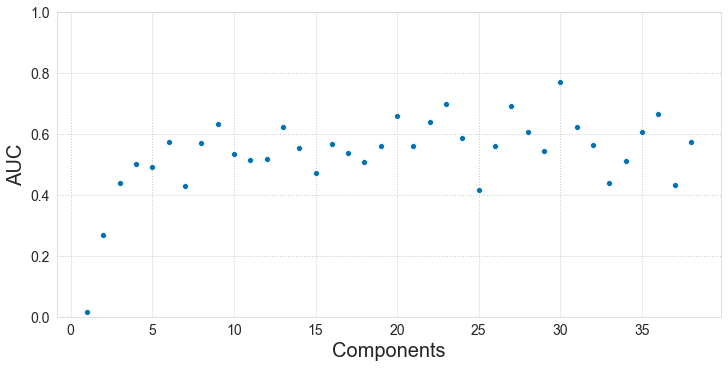

In [8]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [9]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

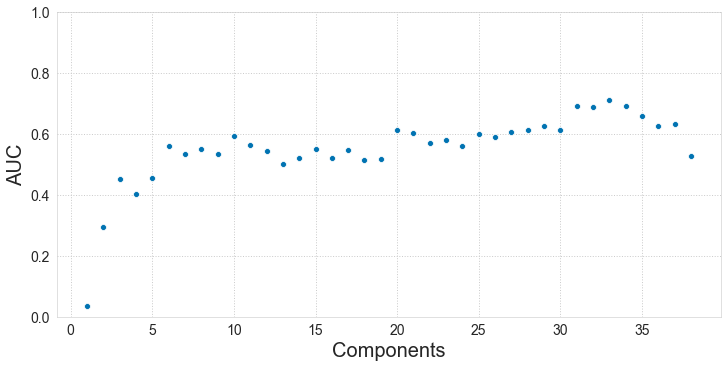

In [10]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [18]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

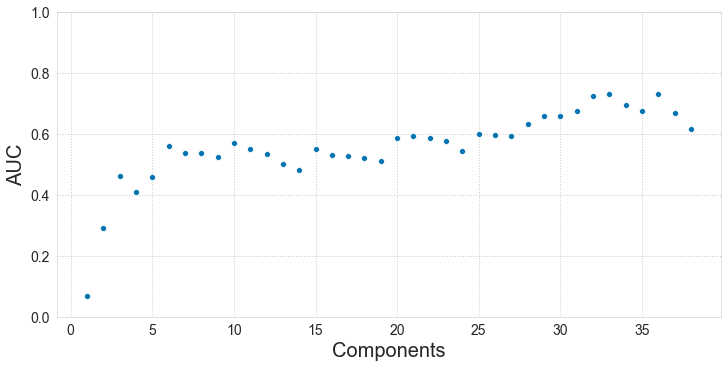

In [19]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [20]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

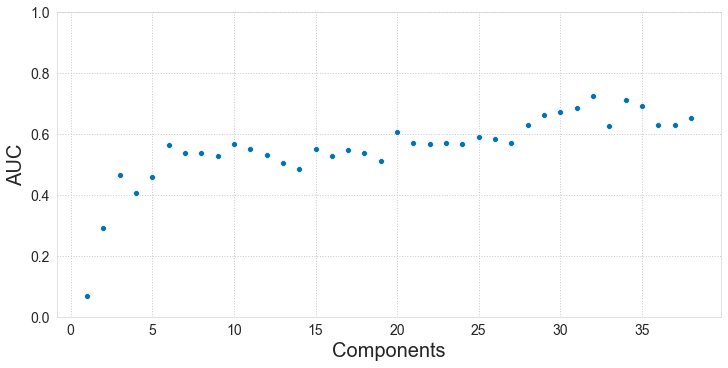

In [21]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

## tol 1e-9, fit intercept True

In [22]:
def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=True).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-9, n_iter_max=10000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

In [23]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

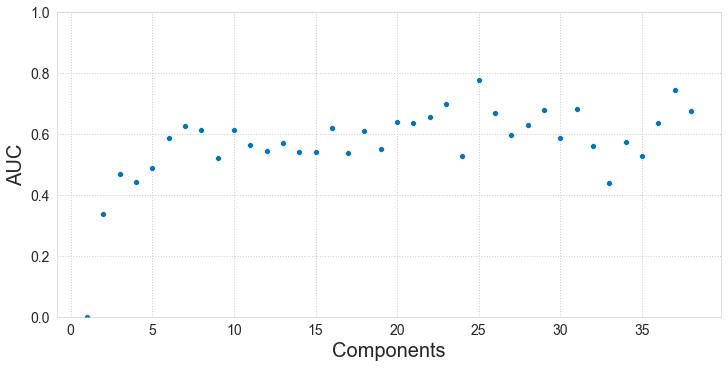

In [24]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [25]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

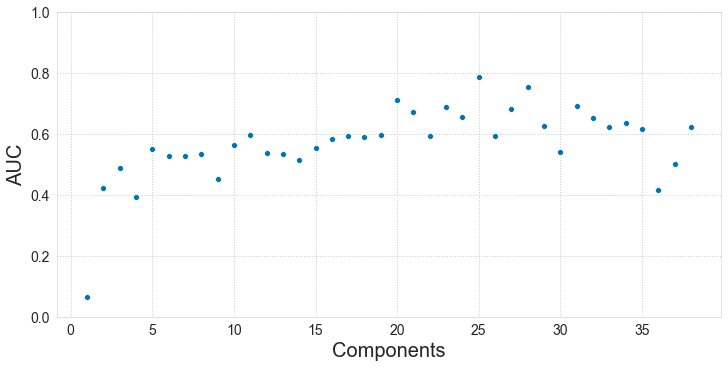

In [26]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [27]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

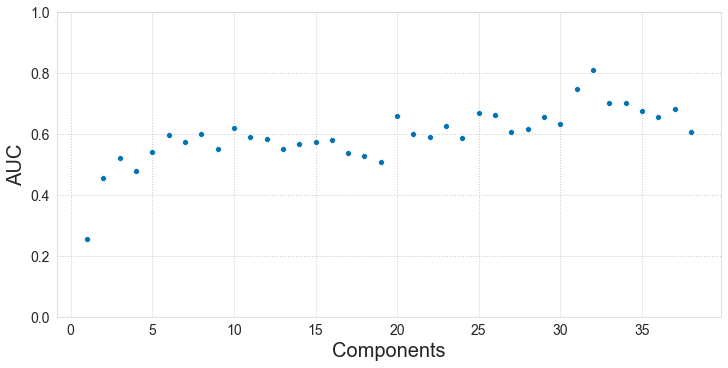

In [28]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [29]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

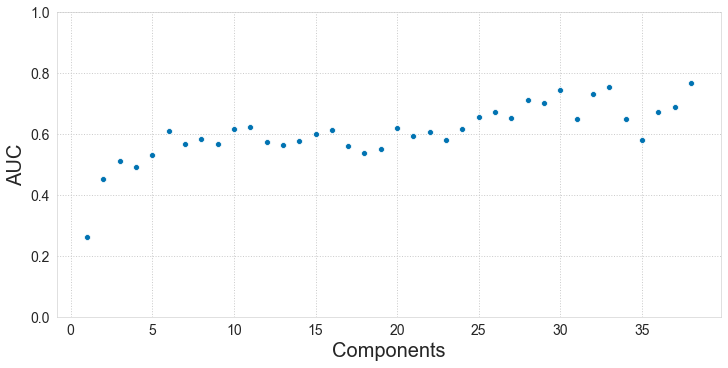

In [30]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [31]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

(0, 1)

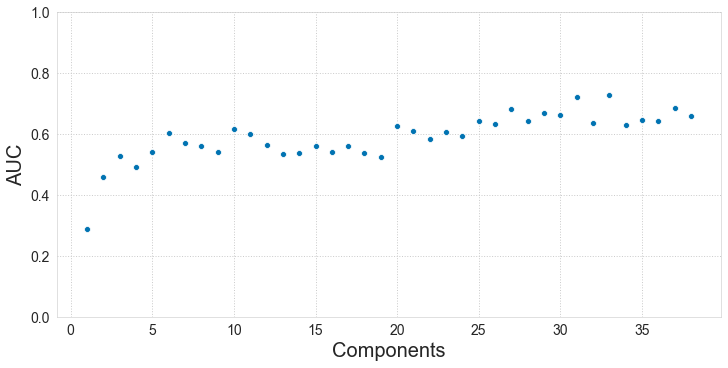

In [32]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

## tol = 1e-7, fit intercept True

In [ ]:
def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=True).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-7, n_iter_max=10000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=10)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=100)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp = pd.DataFrame(values_comps)

In [ ]:
df_comp.columns = ['Components', 'AUC']
ax, f = getSetup((10, 5), (1, 1))
b = sns.scatterplot(data=df_comp, x='Components', y='AUC', ax=ax[0])
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

## Change Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorly.decomposition import parafac2
import tensorly as tl
from tensorly.parafac2_tensor import parafac2_to_slice
from tensorly.metrics.regression import variance as tl_var
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from tfac.figures.figureCommon import subplotLabel, getSetup
from sklearn.metrics import roc_curve, roc_auc_score
from tfac.MRSA_dataHelpers import produce_outcome_bools, get_patient_info, form_MRSA_tensor
from tfac.tensor import R2Xparafac2

def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=False).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, tol=1e-7, n_iter_max=1000, random_state=random_state)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor

In [2]:
#tensor_slices, parafac2tensor = MRSA_decomposition(1, 38)
#patient_matrix = parafac2tensor[1][2]
_, statusID = get_patient_info()
outcomes = produce_outcome_bools(statusID)

for variance in [1e-6, 1e-4, .001, .01, .1, 1, 10]:
    print(variance)
    AllR2X = []
    for components in range(1, 39):
        print(variance, components)
        tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
        AllR2X.append(np.round(R2Xparafac2(tensor_slices, parafac2tensor), 6))
        patient_matrix = parafac2tensor[1][2]
        for C in [.01, .1, 1, 10, 100, 100000]:
            score_y = find_CV_decisions(patient_matrix, outcomes, C=C)
            auc = roc_auc_score(outcomes, score_y)
            print(variance, components, auc, C)
    print(AllR2X)

1e-06
1e-06 1
1e-06 1 0.5 0.01
1e-06 1 0.6204301075268817 0.1
1e-06 1 0.6311827956989247 1
1e-06 1 0.6118279569892473 10
1e-06 1 0.6129032258064516 100
1e-06 1 0.6129032258064516 100000
1e-06 2
1e-06 2 0.5 0.01
1e-06 2 0.5451612903225806 0.1
1e-06 2 0.5623655913978495 1
1e-06 2 0.5698924731182796 10
1e-06 2 0.5741935483870968 100
1e-06 2 0.5741935483870968 100000
1e-06 3


KeyboardInterrupt: 

In [3]:
#tensor_slices, parafac2tensor = MRSA_decomposition(1, 38)
#patient_matrix = parafac2tensor[1][2]
_, statusID = get_patient_info()
outcomes = produce_outcome_bools(statusID)

for variance in [1e-6, 1e-4, .001, .01, .1, 1, 10]:
    print(variance)
    AllR2X = []
    for components in range(1, 39):
        print(variance, components)
        tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
        AllR2X.append(np.round(R2Xparafac2(tensor_slices, parafac2tensor), 6))
        patient_matrix = parafac2tensor[1][2]
        for C in [.01, .1, 1, 10, 100, 100000]:
            score_y = find_CV_decisions(patient_matrix, outcomes, C=C)
            auc = roc_auc_score(outcomes, score_y)
            print(variance, components, auc, C)
    print(AllR2X)

1e-06
1e-06 1
1e-06 1 0.5 0.01
1e-06 1 0.5924731182795699 0.1
1e-06 1 0.610752688172043 1
1e-06 1 0.6118279569892473 10
1e-06 1 0.6086021505376344 100
1e-06 1 0.6129032258064516 100000
1e-06 2
1e-06 2 0.5 0.01
1e-06 2 0.47096774193548385 0.1
1e-06 2 0.5623655913978495 1
1e-06 2 0.5731182795698925 10
1e-06 2 0.5731182795698925 100
1e-06 2 0.5731182795698925 100000
1e-06 3


KeyboardInterrupt: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorly.decomposition import parafac2
import tensorly as tl
from tensorly.parafac2_tensor import parafac2_to_slice
from tensorly.metrics.regression import variance as tl_var
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from tfac.figures.figureCommon import subplotLabel, getSetup
from sklearn.metrics import roc_curve, roc_auc_score
from tfac.MRSA_dataHelpers import produce_outcome_bools, get_patient_info, form_MRSA_tensor
from tfac.tensor import R2Xparafac2

tl.set_backend("numpy")

In [26]:
def find_CV_decisions(patient_matrix, outcomes, n_splits=61, random_state=None, C=1):
    kf = KFold(n_splits=n_splits)
    decisions = []
    for train, test in kf.split(patient_matrix):
        clf = LogisticRegression(penalty='l1', solver='saga', C=C, random_state=random_state, max_iter=10000, fit_intercept=False).fit(patient_matrix[train], outcomes[train])
        decisions.append(clf.decision_function(patient_matrix[test]))
    score_y = decisions
    return score_y

def MRSA_decomposition(variance, components, random_state=None):
    '''Perform tensor formation and decomposition for particular variance and component number
    ---------------------------------------------
    Returns
        parafac2tensor object
        tensor_slices list
    '''
    tensor_slices, _, _ = form_MRSA_tensor(variance)
    parafac2tensor = None
    best_error = np.inf
    for _ in range(1):
        decomposition, errors = parafac2(tensor_slices, components, return_errors=True, random_state=random_state, verbose=False)
        if best_error > errors[-1]:
            best_error = errors[-1]
            parafac2tensor = decomposition
    return tensor_slices, parafac2tensor
variance = .007
_, statusID = get_patient_info()
outcomes = produce_outcome_bools(statusID)

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1000)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp1 = pd.DataFrame(values_comps)

In [ ]:
df_comp1.columns = ['Components', 'AUC']

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1000)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp2 = pd.DataFrame(values_comps)

In [ ]:
df_comp2.columns = ['Components', 'AUC']

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1000)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp3 = pd.DataFrame(values_comps)

In [ ]:
df_comp3.columns = ['Components', 'AUC']

In [ ]:
values_comps = []
for components in range(1, 39):
    tensor_slices, parafac2tensor = MRSA_decomposition(variance, components)
    patient_matrix = parafac2tensor[1][2]

    score_y = find_CV_decisions(patient_matrix, outcomes, random_state=None, C=1000)
    auc = roc_auc_score(outcomes, score_y)
    values_comps.append([components, auc])
df_comp4 = pd.DataFrame(values_comps)

In [ ]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .007, C=1000, def, fit intercept false, line search, with no mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

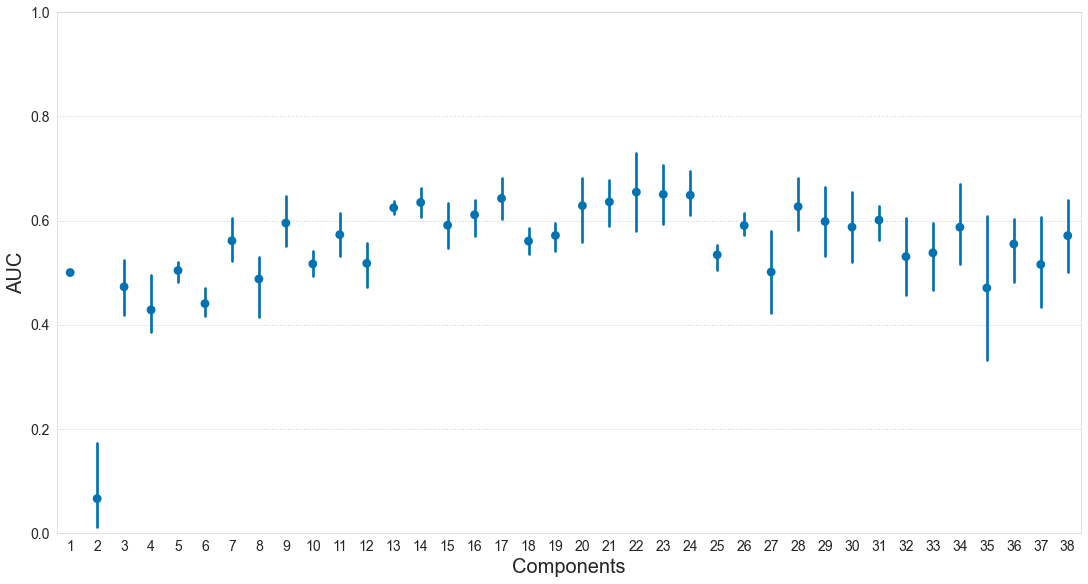

In [34]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .007, C=1, def, fit intercept false, line search, with no mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

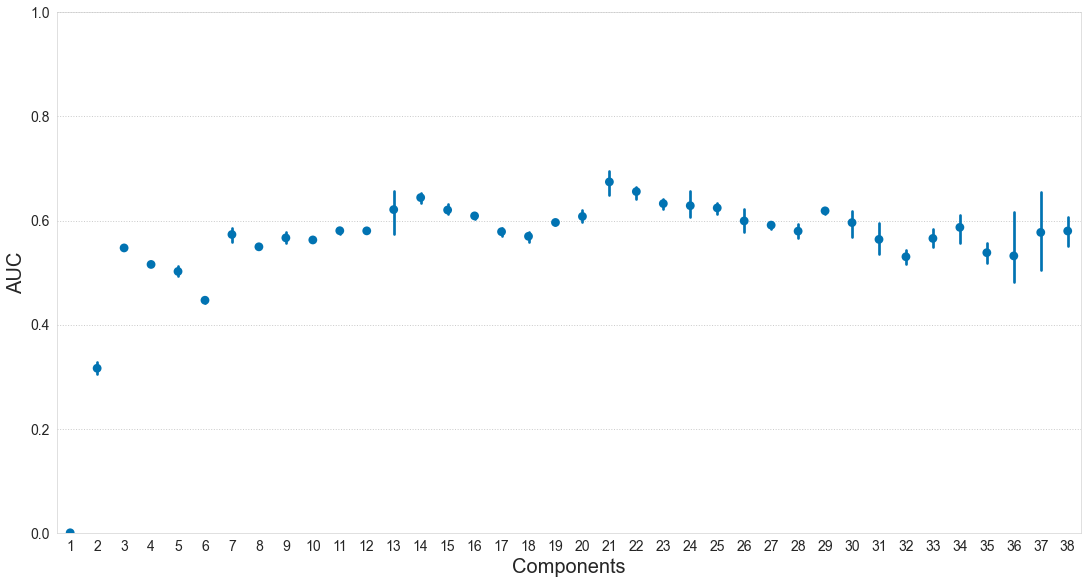

In [16]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .005, C=10, defaults, fit intercept false, line search, with no mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

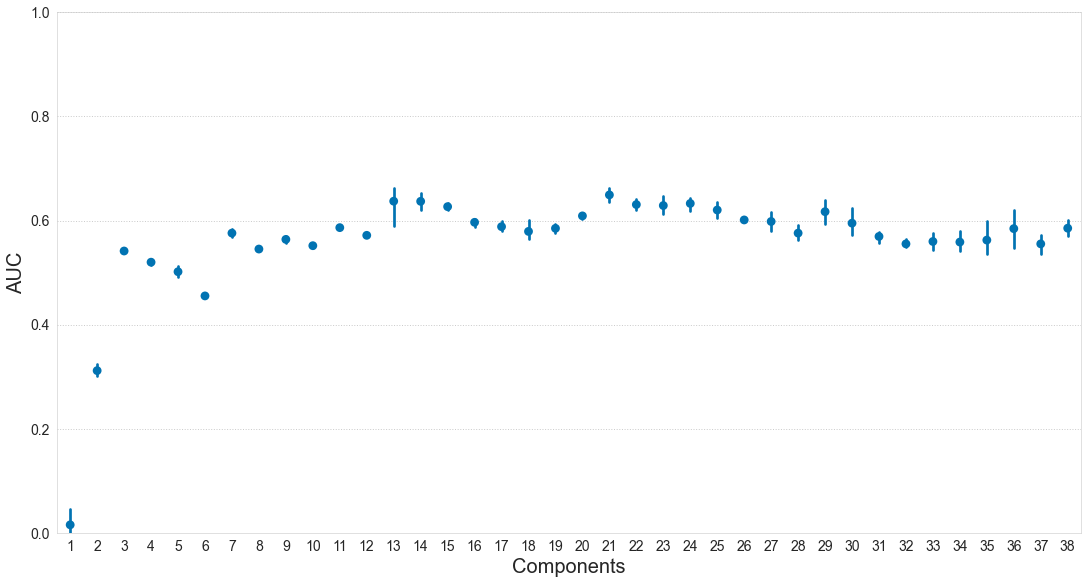

In [16]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .007, C=10, defaults, fit intercept false, line search, with no mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

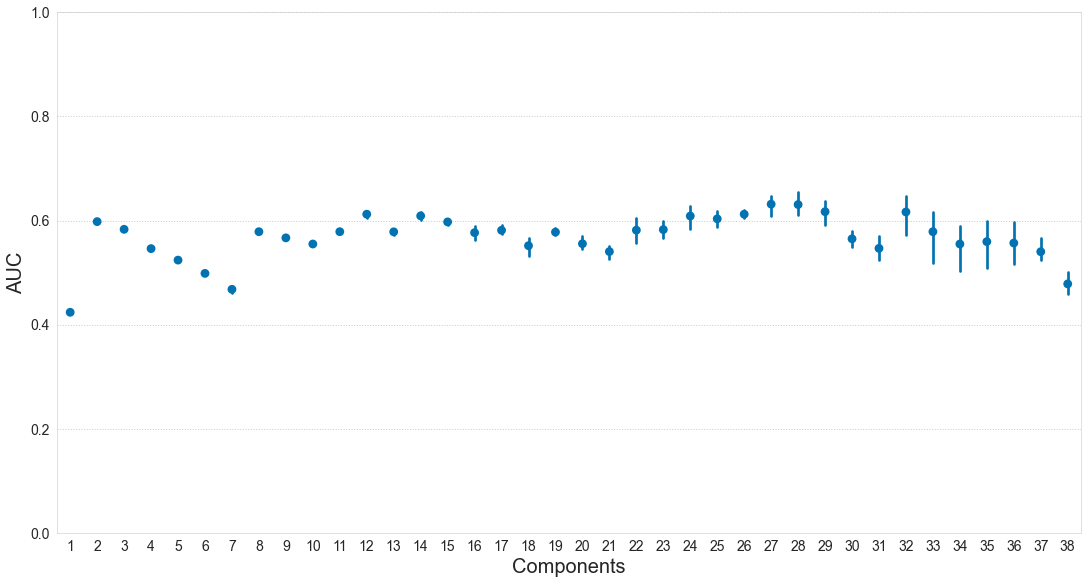

In [10]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .05, C=10, tol = 1e-6, fit intercept false, line search, with mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

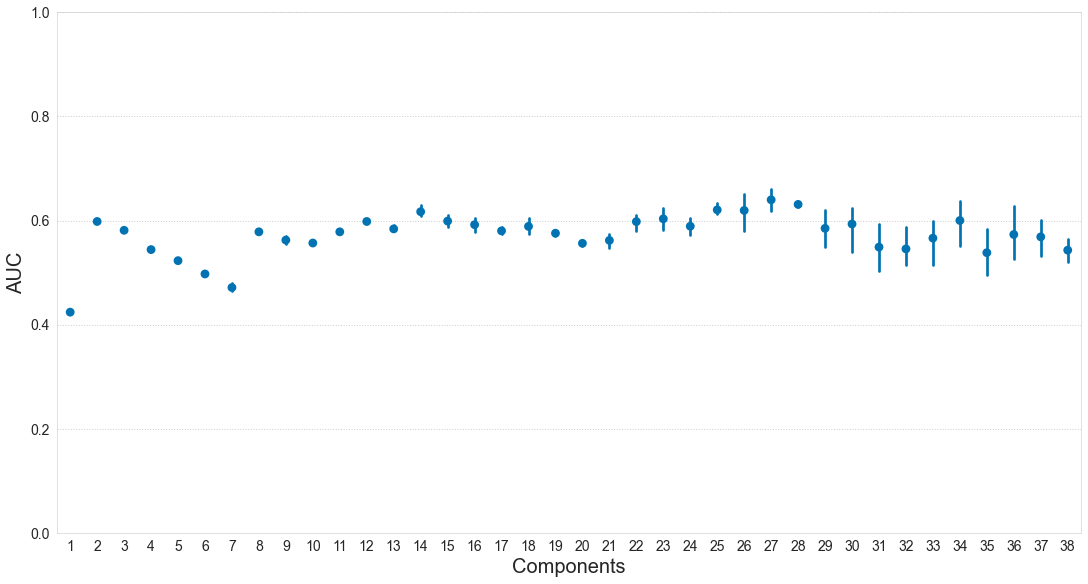

In [22]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .05, C=10, tol = 1e-6, fit intercept false, line search, no mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

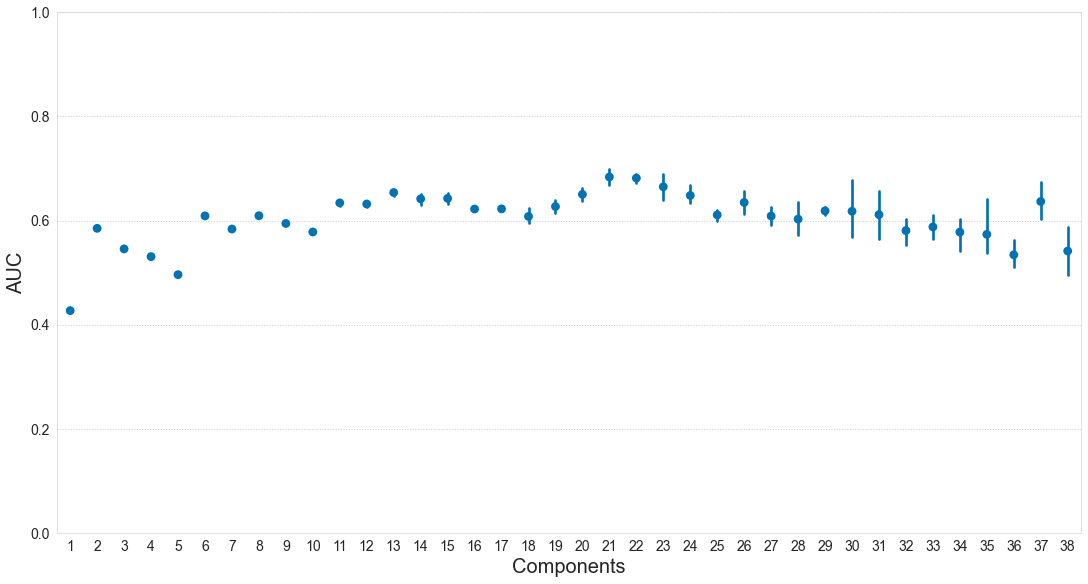

In [10]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#double, var = .005, C=10, tol = 1e-6, fit intercept false, line search, no mean center
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

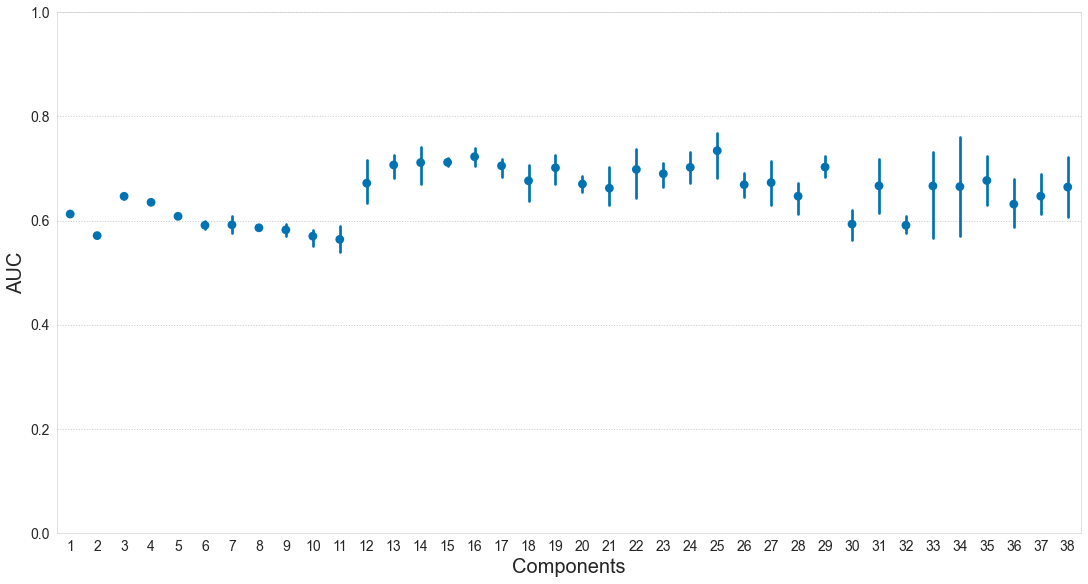

In [14]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#triple normed, var = .005, C=10, tol = 1e-5, fit intercept false, line search
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

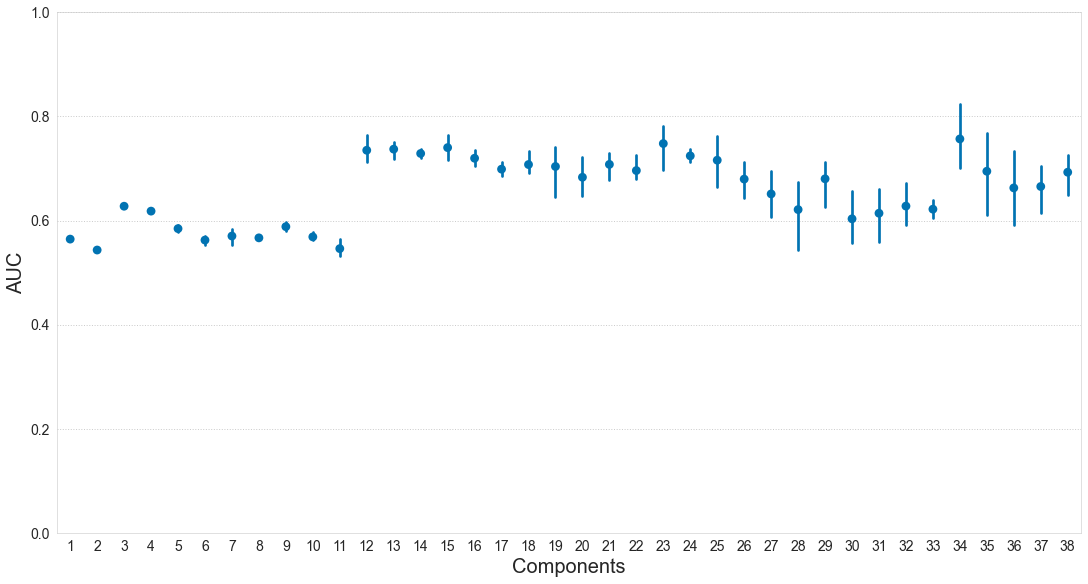

In [22]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#triple normed, var = .005, C=10, tol = 1e-8, fit intercept True
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

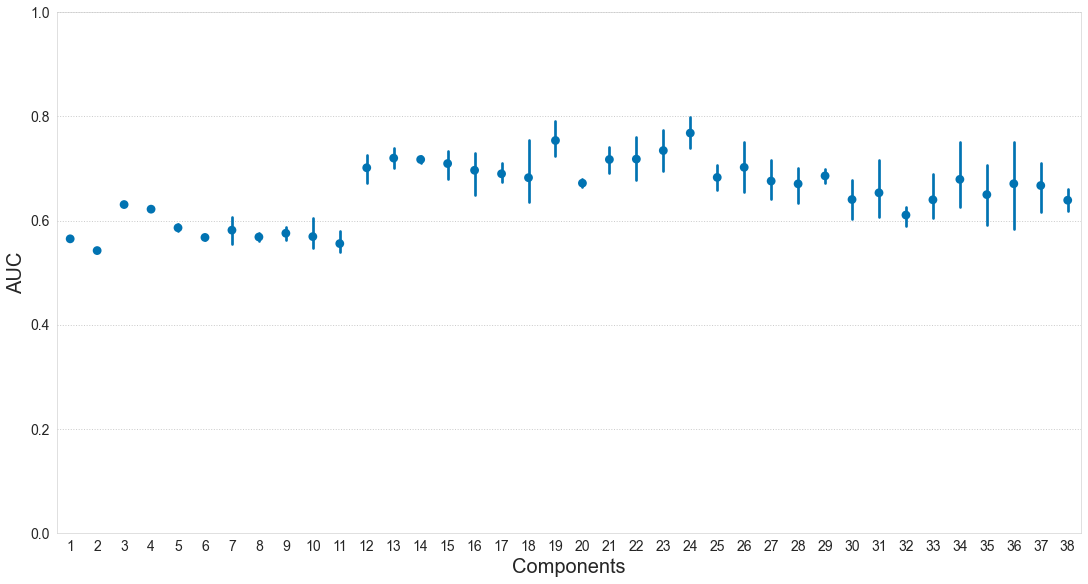

In [11]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#triple normed, var = .005, C=10, tol = 1e-5, fit intercept True
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

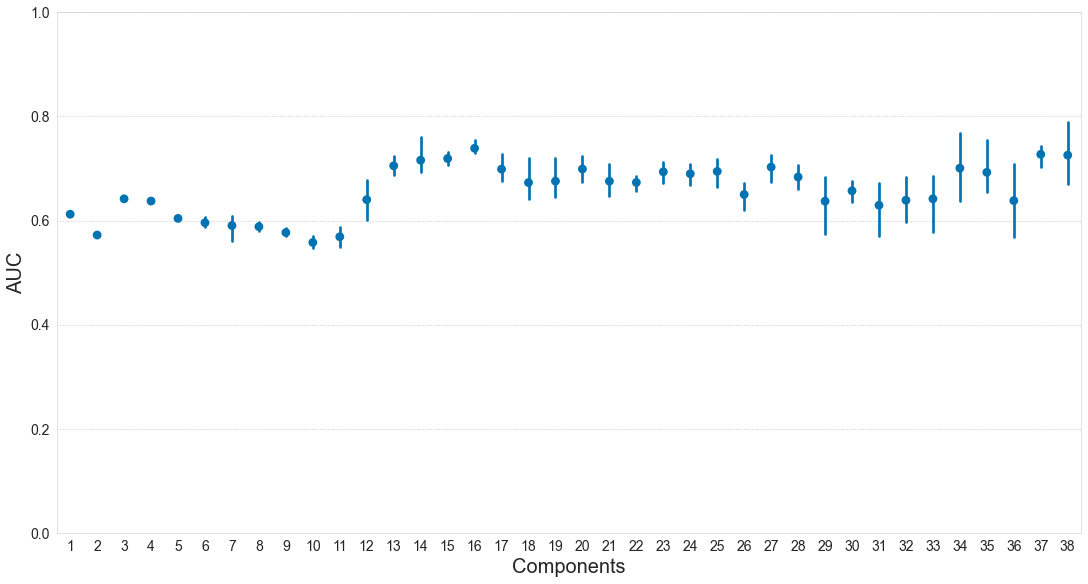

In [21]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#triple normed, var = .01, C=10, tol = 1e-5
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

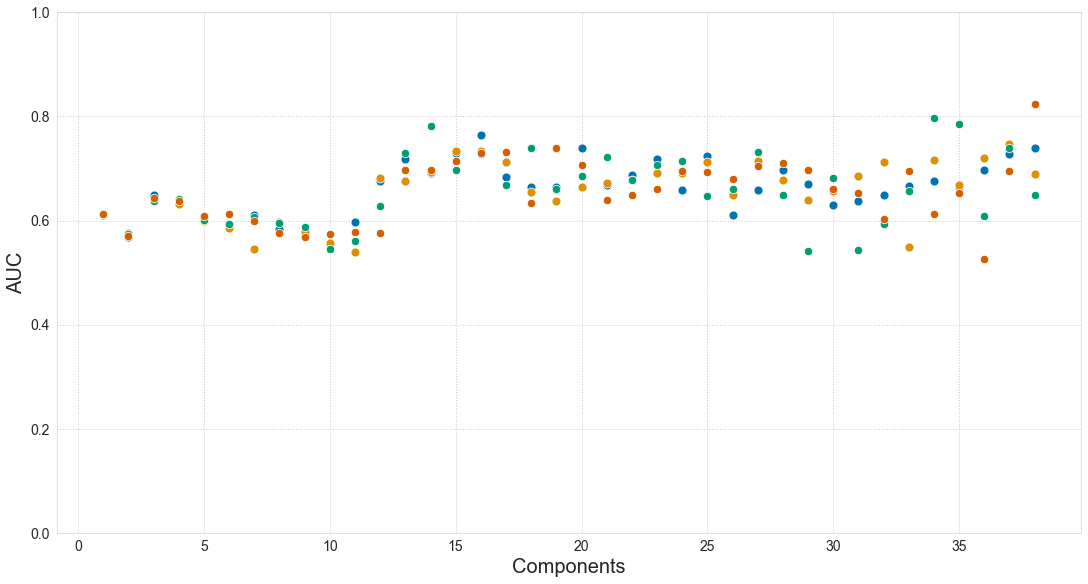

In [22]:
df_comp4.columns = ['Components', 'AUC']
ax, f = getSetup((15, 8), (1, 1))
b = sns.scatterplot(data=df_comp1, x='Components', y='AUC', ax=ax[0], s=80) # blue
b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], s=80) #orange
b = sns.scatterplot(data=df_comp3, x='Components', y='AUC', ax=ax[0], s=70) #green
b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)

(0.0, 1.0)

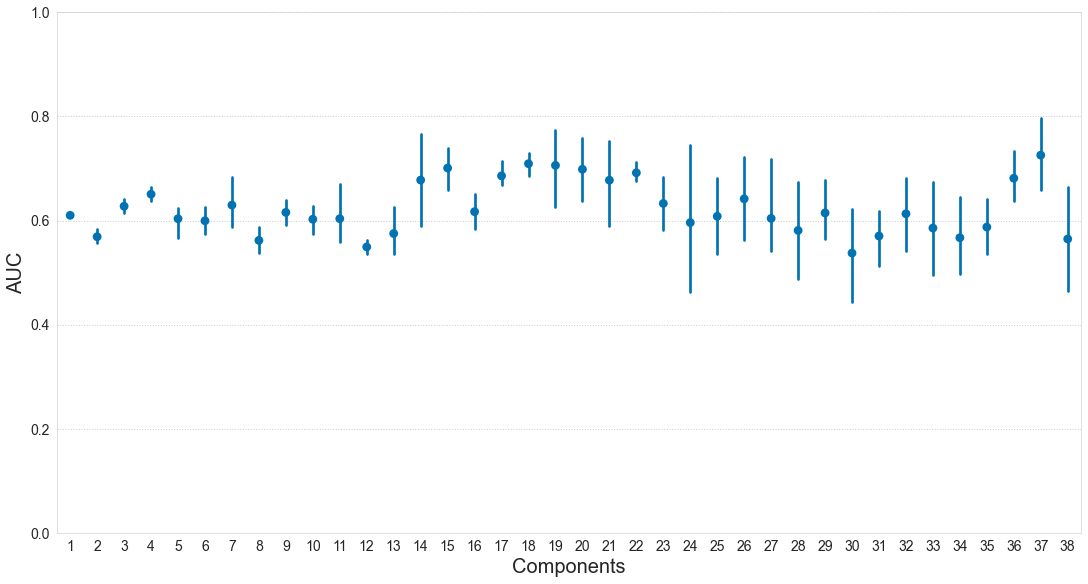

In [13]:
df_comp4.columns = ['Components', 'AUC']
df1 = pd.concat([df_comp1, df_comp2])
df2 = pd.concat([df_comp3, df_comp4])
df = pd.concat([df1, df2])
ax, f = getSetup((15, 8), (1, 1))
b = sns.pointplot(data=df, x='Components', y='AUC', ax=ax[0], s=70, join=False) # blue
#b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], marker='s', s=80) #orange
#b = sns.pointplot(data=df2, x='Components', y='AUC', ax=ax[0], s=70, join=False, color='orange') #green
#b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)
#plt.savefig('G4.png', dpi = 300)

(0.0, 1.0)

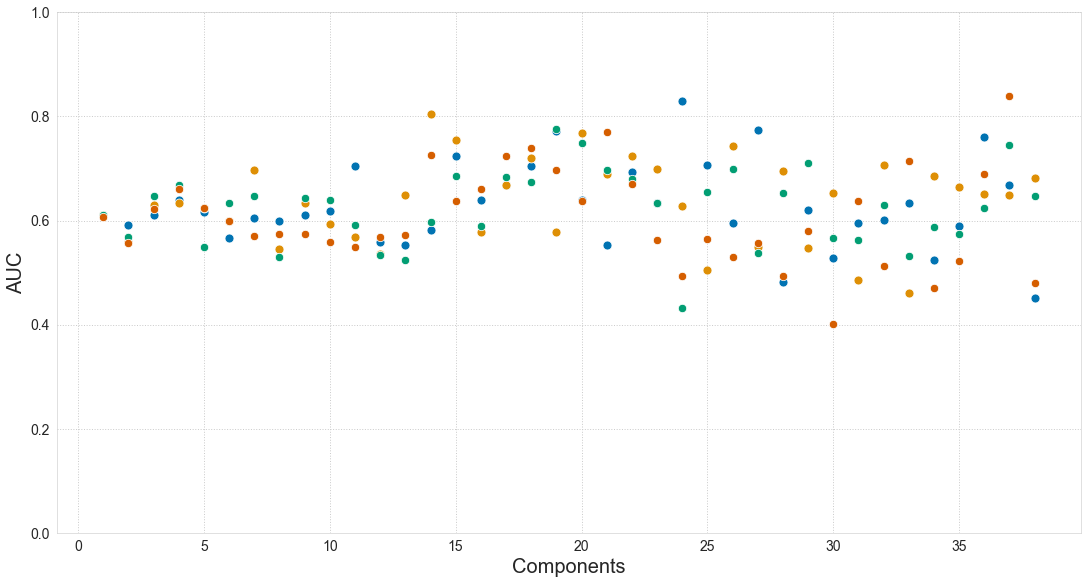

In [14]:
df_comp4.columns = ['Components', 'AUC']
ax, f = getSetup((15, 8), (1, 1))
b = sns.scatterplot(data=df_comp1, x='Components', y='AUC', ax=ax[0], s=80) # blue
b = sns.scatterplot(data=df_comp2, x='Components', y='AUC', ax=ax[0], s=80) #orange
b = sns.scatterplot(data=df_comp3, x='Components', y='AUC', ax=ax[0], s=70) #green
b = sns.scatterplot(data=df_comp4, x='Components', y='AUC', ax=ax[0], s=70) #red
b.set_xlabel("Components",fontsize=20)
b.set_ylabel("AUC",fontsize=20)
b.tick_params(labelsize=14)
ax[0].set_ylim(0, 1)


## 

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from tfac.figures.figureCommon import subplotLabel, getSetup
from tfac.MRSA_dataHelpers import get_patient_info, produce_outcome_bools, find_CV_decisions
from tfac.tensor import MRSA_decomposition

_, outcomeID = get_patient_info()

true_y = produce_outcome_bools(outcomeID)


variance_list = [.0001, .001, .005, .007, .01, .05, .1, .5]
components = [15, 20, 25, 30]
df_vars = []
for component in components:
    values_vars = []
    for variance in variance_list:
        tensor_slices, parafac2tensor = MRSA_decomposition(variance, component)
        patient_matrix = parafac2tensor[1][2]

        score_y = find_CV_decisions(patient_matrix, true_y, C=10)
        auc = roc_auc_score(true_y, score_y)
        values_vars.append([variance, auc])
    df_var = pd.DataFrame(values_vars)
    df_var.columns = ['Variance', 'AUC']
    df_vars.append(df_var)

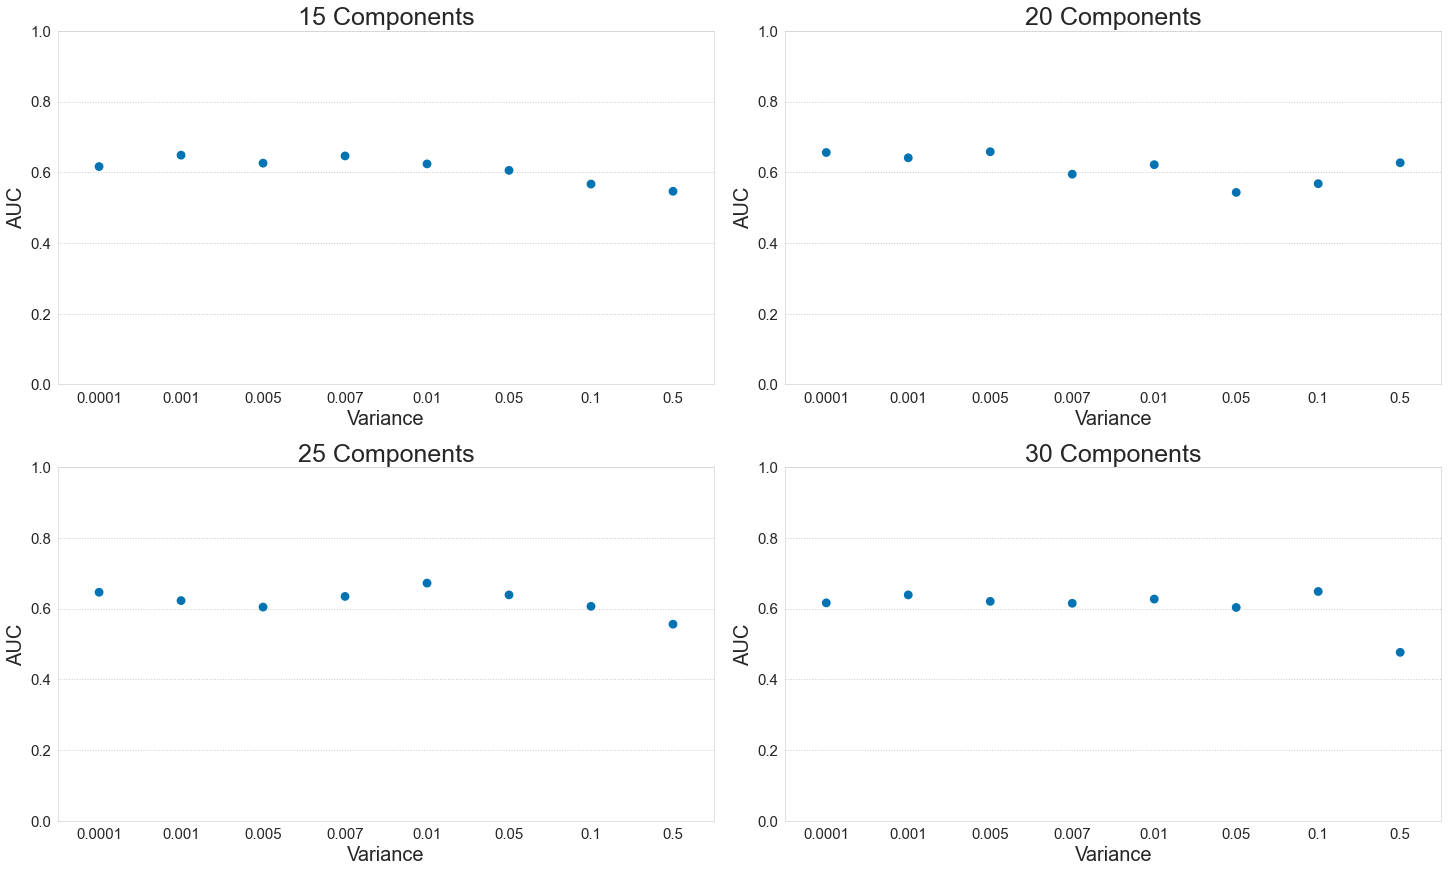

In [7]:
ax, f = getSetup((20, 12), (2, 2))
for idx, df_v in enumerate(df_vars):
    b = sns.pointplot(data=df_v, x='Variance', y='AUC', join=False, ax=ax[idx])
    b.set_title(str(components[idx]) + " Components", fontsize=25)
    b.set_xlabel("Variance", fontsize=20)
    b.set_ylabel("AUC", fontsize=20)
    b.tick_params(labelsize=15)
    b.set_xticklabels(variance_list)
    ax[idx].set_ylim(0, 1)

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from tfac.figures.figureCommon import subplotLabel, getSetup
from tfac.MRSA_dataHelpers import get_patient_info, produce_outcome_bools, find_CV_decisions
from tfac.tensor import MRSA_decomposition

_, outcomeID = get_patient_info()

true_y = produce_outcome_bools(outcomeID)

variance_list = [.0001, .001, .005, .007, .01, .05, .5]
components = range(1, 39)
df_vars = []
for component in components:
    values_vars = []
    for variance in variance_list:
        tensor_slices, parafac2tensor = MRSA_decomposition(variance, component)
        patient_matrix = parafac2tensor[1][2]

        score_y = find_CV_decisions(patient_matrix, true_y, C=10)
        auc = roc_auc_score(true_y, score_y)
        values_vars.append([variance, auc])
    df_var = pd.DataFrame(values_vars)
    df_var.columns = ['Variance', 'AUC']
    df_vars.append(df_var)

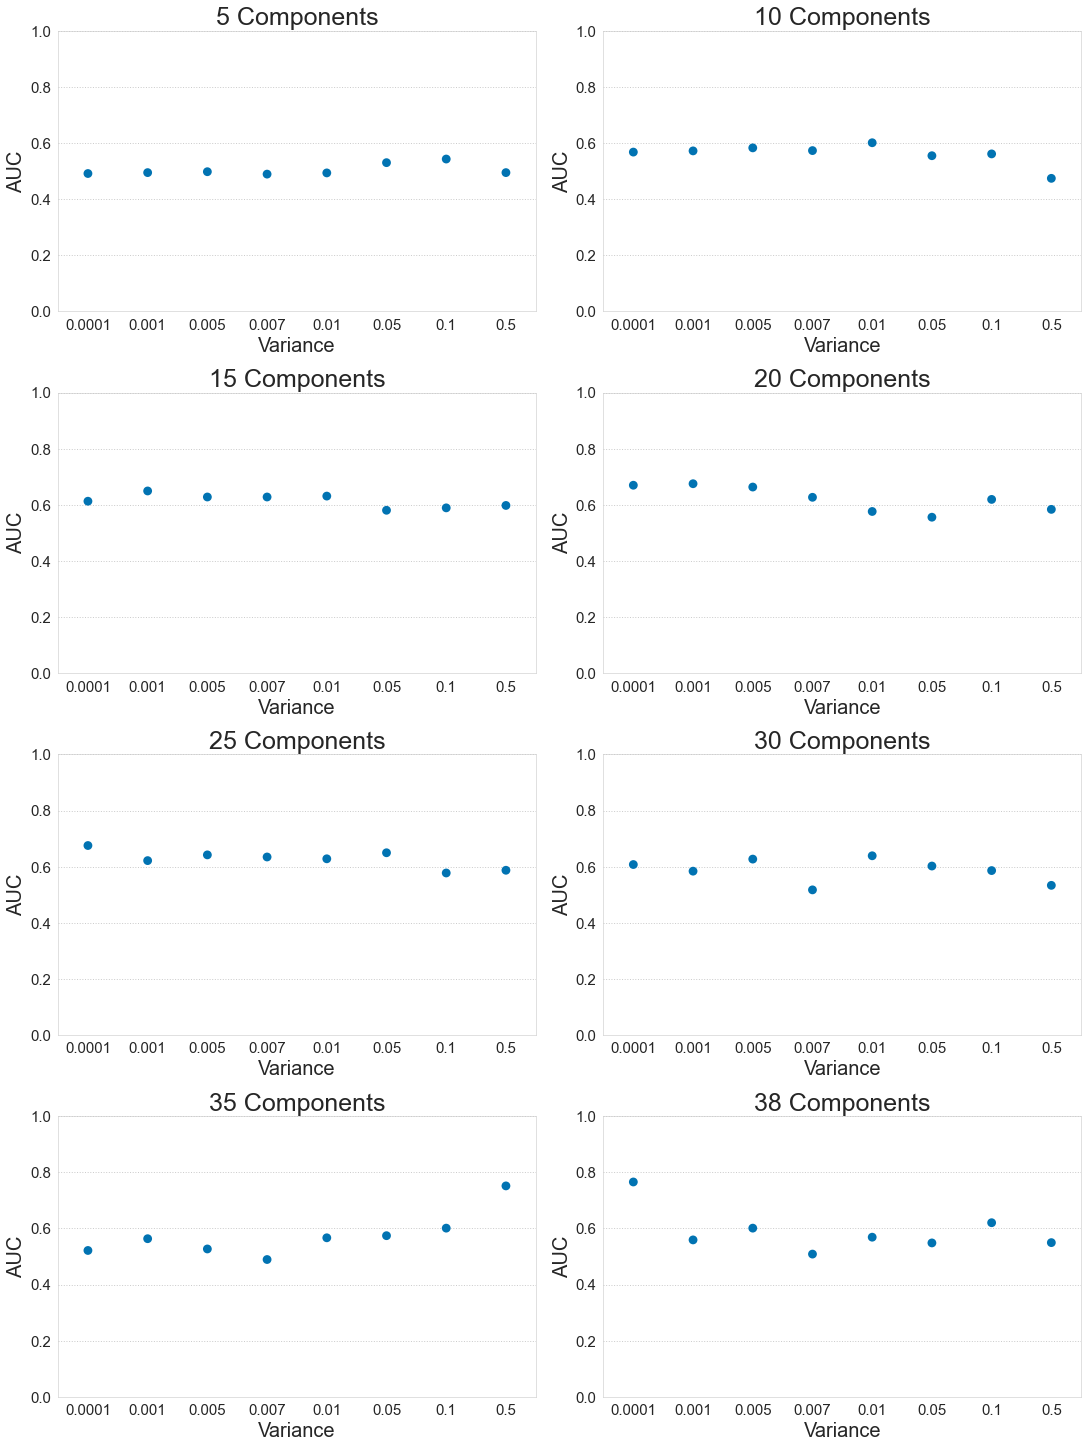

In [27]:
ax, f = getSetup((15, 20), (4, 2))
comps = [4, 9, 14, 19, 24, 29, 34, 37]
for idx, comp in enumerate(comps):
    b = sns.pointplot(data=df_vars[comp], x='Variance', y='AUC', join=False, ax=ax[idx])
    b.set_title(str(components[comp]) + " Components", fontsize=25)
    b.set_xlabel("Variance", fontsize=20)
    b.set_ylabel("AUC", fontsize=20)
    b.tick_params(labelsize=15)
    b.set_xticklabels(variance_list)
    ax[idx].set_ylim(0, 1)

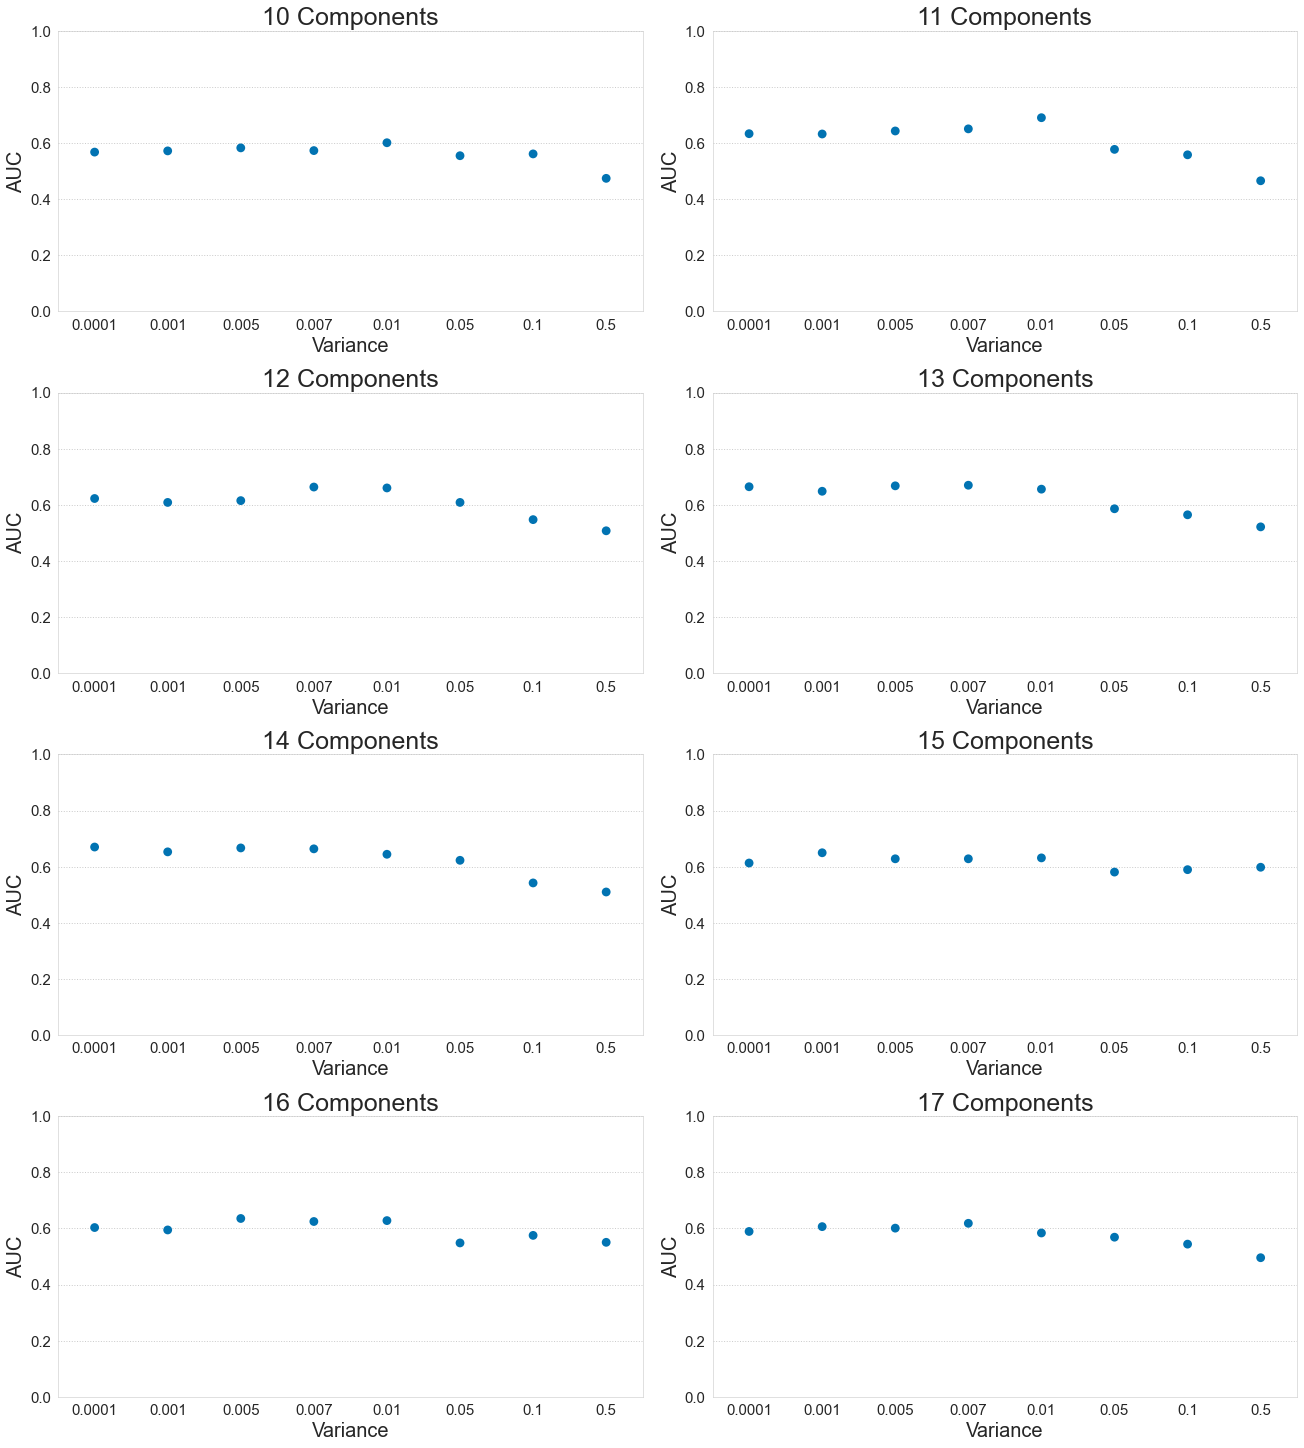

In [19]:
ax, f = getSetup((18, 20), (4, 2))
comps = [9, 10, 11, 12, 13, 14, 15, 16]
for idx, comp in enumerate(comps):
    b = sns.pointplot(data=df_vars[comp], x='Variance', y='AUC', join=False, ax=ax[idx])
    b.set_title(str(components[comp]) + " Components", fontsize=25)
    b.set_xlabel("Variance", fontsize=20)
    b.set_ylabel("AUC", fontsize=20)
    b.tick_params(labelsize=15)
    b.set_xticklabels(variance_list)
    ax[idx].set_ylim(0, 1)

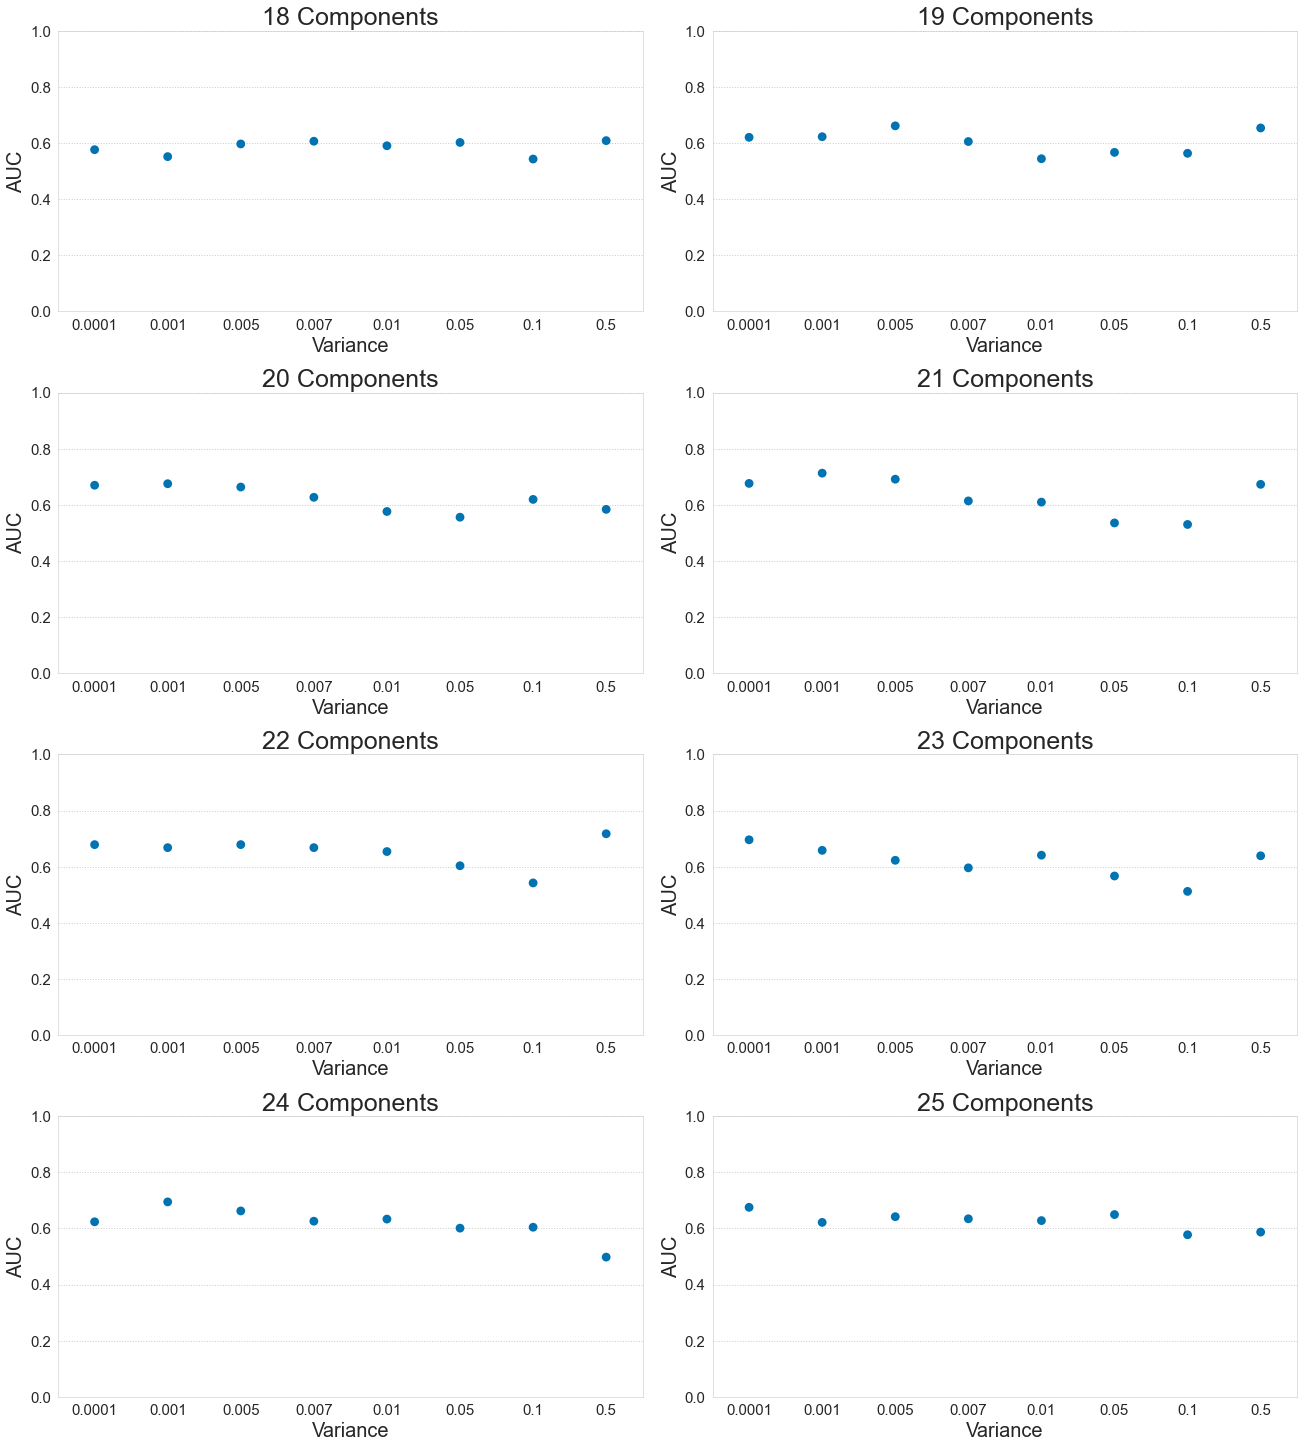

In [20]:
ax, f = getSetup((18, 20), (4, 2))
comps = [17, 18, 19, 20, 21, 22, 23, 24]
for idx, comp in enumerate(comps):
    b = sns.pointplot(data=df_vars[comp], x='Variance', y='AUC', join=False, ax=ax[idx])
    b.set_title(str(components[comp]) + " Components", fontsize=25)
    b.set_xlabel("Variance", fontsize=20)
    b.set_ylabel("AUC", fontsize=20)
    b.tick_params(labelsize=15)
    b.set_xticklabels(variance_list)
    ax[idx].set_ylim(0, 1)

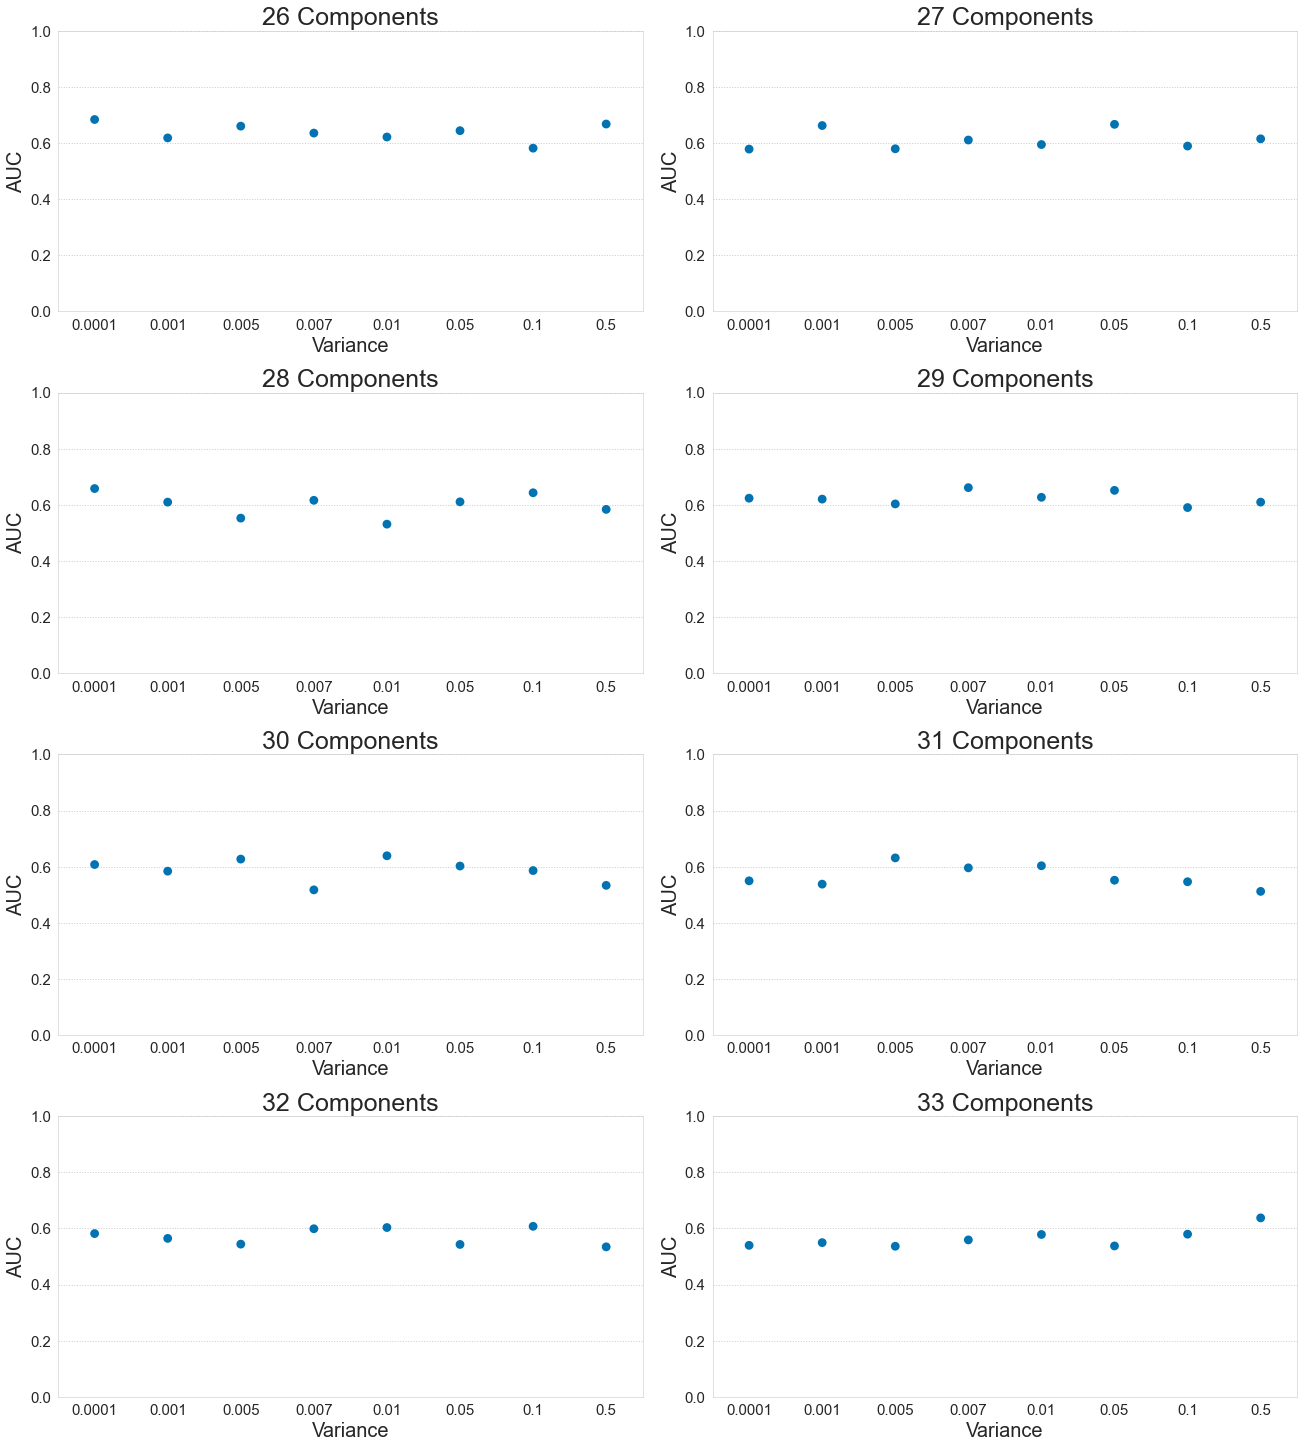

In [22]:
ax, f = getSetup((18, 20), (4, 2))
comps = [25, 26, 27, 28, 29, 30, 31, 32]
for idx, comp in enumerate(comps):
    b = sns.pointplot(data=df_vars[comp], x='Variance', y='AUC', join=False, ax=ax[idx])
    b.set_title(str(components[comp]) + " Components", fontsize=25)
    b.set_xlabel("Variance", fontsize=20)
    b.set_ylabel("AUC", fontsize=20)
    b.tick_params(labelsize=15)
    b.set_xticklabels(variance_list)
    ax[idx].set_ylim(0, 1)